## Lab 11.1

Remember to commit your lab notebook to your repo once you entered a lab quiz answer.

Spread-out over this lab and Assignment 4, and based on the explanations in class 11.1 create a nuclear network code notebook for the CN cycle. 

In this lab we will focus on a fixed temperature of $T=1.55\times10^{8}\mathrm{K}$ and a density of $\rho = 1\mathrm{g/cm^3}$. 


## Activity 1
Name: `initial-abu-sum`, `test-term0`, `test-f_rhs`


1. Read initial abundance file `data/iniab1.4E-02As09.ppn`. Make sure you read in such a way that you also have a list of element name strings that is the 2nd column in the file. Enter the sum of the _molar_ fractions into quiz question `initial-abu-sum`.
2. A simple `get_rates` function returns the rates for `T9=0.155`: 
```Python
def get_rates():
    return [0.0012654285936930718, 0.003997856529541228, 0.0001810499744410427, 7.031858377405542]
```
Create a function `react_terms` that takes an abundance vector with all 6 abundances as input and returns the four terms that describe the production/reaction for each reaction, for example `rate[0]*Y[2]*Y[0]` for `C12(p,g)`. In order to get the rate vector the function would call `get_rates`. Test the equation and enter `log10` of the first element of what `react_terms` returns (`terms[0]`) into quiz `test-term0`.
4. Provide a function `f_rhs` for the RHS of the system of ODEs. The RHS for each of the 6 equations (one for each abundance) are made up of the terms provided by `react_terms`. Test the equation. Enter the in quiz question `test-f_rhs` the `log10` of the term representing the RHS of the equation  for $\frac{dY(^{12}C)}{dt}$.


correction in 3. want dY(12C)/dt, not dX(12C)/dt

In [1]:
#%pylab ipympl
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from matplotlib import cm

In [2]:
#1
#f = open('../Data/iniab1.4E-02As09.ppn')
charge, element, a, x = np.loadtxt('../Data/iniab1.4E-02As09.ppn', dtype=str, unpack=True) 
charge = charge.astype('float64')
a = a.astype('float64') #atomic mass number (molar mass)
x = x.astype('float64') #abundance of each element

Y0 = x/a #molar fraction = x/a
print("Q1, initial-abu-sum: sum of molar fractions = %.6f" %sum(Y0))

Q1, initial-abu-sum: sum of molar fractions = 0.783211


In [3]:
#2
def get_rates():
    #generally this would be calculated, but here it's given to us
    return [0.0012654285936930718, 0.003997856529541228, 0.0001810499744410427, 7.031858377405542]

def react_terms(Y,r=get_rates()):
    #columns for the production and destruction terms for lhs of ODEs
    #Y = [Y(p), Y(He4), Y(C12), Y(C13), Y(N14), Y(N15)]   <--- DIFFERENT from order of equations in lecture notes!
    # so Y(He4)=Y[1], and Y(C12)=Y[2]
    r0,r1,r2,r3 = r
    return [r0*Y[2]*Y[0],    #r0*Y(C12)*y(p)
            r1*Y[3]*Y[0],    #r1*Y(C13)*y(p)
            r2*Y[4]*Y[0],    #r2*Y(N14)*y(p)
            r3*Y[5]*Y[0]     #r3*Y(N15)*y(p) 
    ]

q2 = react_terms(Y0)
print("Q2, test-term0: log10(react_terms(Y0)[0]) = %.6f" %np.log10(q2[0]))

Q2, test-term0: log10(react_terms(Y0)[0]) = -6.727509


In [4]:
#3: 
def f_rhs(t, Y):
    #Y = [Y(p), Y(He4), Y(C12), Y(C13), Y(N14), Y(N15)]   <--- DIFFERENT from order of equations in lecture notes!
    lhs = react_terms(Y)
    dYp = -lhs[0] - lhs[1] - lhs[2] - lhs[3]
    dYC12 = -lhs[0] + lhs[3]
    dYC13 = lhs[0] - lhs[1]
    dYN14 = lhs[1] - lhs[2]
    dYN15 = lhs[2] - lhs[3]
    dYHe4 = lhs[3]
    return [dYp, dYHe4, dYC12, dYC13, dYN14, dYN15]

## WHAT IS WANTED FOR THIS QUESTION: just the rhs for initial values (don't solve the ODE!?!)
test_eq = f_rhs(0, Y0)
dYC12_init = test_eq[2]
print('Q3, test-f_rhs: log10 of term representing RHS of dY(C12)/dt = %.6f' %np.log10(dYC12_init))
print('A negative RHS means that the molar fraction is decreasing. That is, mass is being lost.')
print()


## IF WE WERE TO SOLVE IT:
# would have to consider a t_range that accurately reflects timescale of the problem (activity 2!)

#consider for 100 (arbitrary choice)
# as t_range increases, answer doesn't seem to converge (as expected).
t_range = (0,100)

sol_100 = integrate.solve_ivp(f_rhs, t_range, Y0)
# print('total solution: \n', sol)
dYC12_sol = sol_100.y[2][-1] #this is RHS of dY(C12)/dt at t=t_end=100
print('SOLVING ODE:')
print('at t=100, log10 of term representing RHS of dY(C12)/dt = %.6f' %np.log10(dYC12_sol))
print(dYC12_sol)

#try for t_range=(0,0)
sol_init = integrate.solve_ivp(f_rhs, (0,0), Y0)
print('log10 of dY(C12)/dt for t_range (0,100) = ',np.log10(sol_init.y[2][-1]))

Q3, test-f_rhs: log10 of term representing RHS of dY(C12)/dt = -6.378775
A negative RHS means that the molar fraction is decreasing. That is, mass is being lost.

SOLVING ODE:
at t=100, log10 of term representing RHS of dY(C12)/dt = -3.722253
0.00018956021171467023
log10 of dY(C12)/dt for t_range (0,100) =  -3.6842866228354674


## Activity 2

Names: `N14-time-scale`, `C13-412`

Finish by Thursday, April 1, 9:30am.


5. To get an idea of the time scale of the problem calculate $\tau_\mathrm{p} = \frac{1}{r_2 Y(p) \rho}$, which is the time scale of $^{14}N$ against capture of protons. Using the values as given this time is in units of seconds. Enter the time in quiz question `N14-time-scale` 
6. From the data in the initial abundance file create a list of element names with mass numbers for the species from the data in the initial abundance file, e.g. `c13` for the C isotope with mass $A=13$.
7. Using the utilities created in part 1. to 6. solve the network ODEs using `solve_ivp` for $t\in[0.,2000.]$ for $\rho$, $T$ specified above. **Important:** This set of differential equations is _stiff_ and you need to select a solver that can deal with stiff problems. Check the docstring! Also, make sure you require high enough precision so that the integration is numerically converged. Make a plot of the time evolution of all six species. Plot `log(X)` where `X` is the mass fraction of each species, versus time in seconds. All lines should be in the same plot, and each line needs to have different shape, colour and glyph. Place glyphs at appropriate distances so that they help distinguish the species but do not overcrowd the plot. Use the element labels created in 6. as legend labels.
8. Create a linear interpolation for the C13 mass fraction (you may use a library) as a function of time and evaluate that interpolation at $t = 412.1$. What is the C13 mass fraction at that time? Enter the `log10` of that abundance into quiz `C13-412`.

In [5]:
#5
r0,r1,r2,r3 = get_rates()

T_rho = lambda Yp, rho: 1/(r2*Yp*rho)

print('Q1, N14-time-scale = %.6f' %T_rho(Y0[0], 1))

Q1, N14-time-scale = 7720.782071


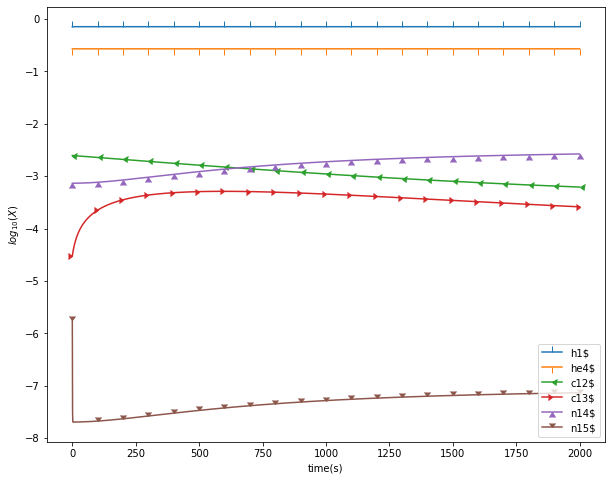

In [14]:
#6
el_mass = []
for el,mass in zip(element, a):
    el_mass.append(el+str(int(mass)))
    
#7: NOW solve the ODEs :)
t_range = (0,2000)
t_eval = np.linspace(0,2000, 2001) #for line plots
#since using rho & T as specified above, also use the same rate coeffs

#solution (using the right solvers and precision) 
# there is a noticaable difference at start for diff rtol,atol. convergest past rtol=1e-9,atol=1e-13 
sol = integrate.solve_ivp(f_rhs, t_range, Y0, t_eval=t_eval, method='Radau', rtol=1e-10, atol=1e-14)
sol_rhs = sol.y
#plot
#list of glyphs: USE marker, markevery!! in normal plot! so nice!!
#mass fraction, X = Y*a 
plt.figure(1, figsize=(10,8))
for i in range(len(sol_rhs)):
    X = np.log10(sol_rhs[i]*a[i])
    plt.plot(sol.t, X, label='%s$' %el_mass[i], marker=i+2, markevery=100)

plt.xlabel('time(s)')
plt.ylabel('$log_{10}(X)$')
plt.legend(fontsize=10, loc='lower right')    
plt.show()
plt.close(1)


8. Create a linear interpolation for the C13 mass fraction (you may use a library) as a function of time and evaluate that interpolation at $t = 412.1$. What is the C13 mass fraction at that time? Enter the `log10` of that abundance into quiz `C13-412`.

In [16]:
from scipy import interpolate

evaluating interpolation at t=412.1: 3.7586918774723385e-05
Q2, C13-412: -3.311020


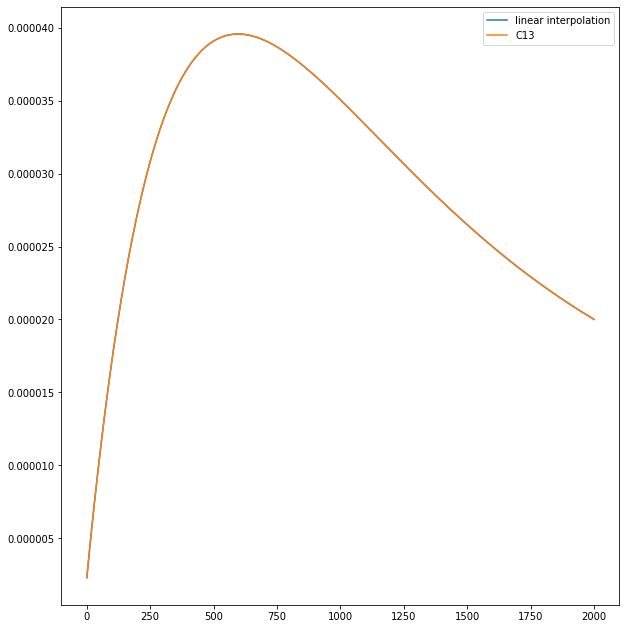

In [22]:
#linear interpolation
C13 = sol.y[3]

f_int1=interpolate.interp1d(t_eval,C13,kind='linear')

#plot for fun
plt.close(4);plt.figure(4, figsize=(10,11))
xgrid=np.linspace(-1.95,1.95,500)
plt.plot(t_eval,f_int1(t_eval),label='linear interpolation')
plt.plot(t_eval, C13, label='C13')
plt.legend(loc=0)

print('evaluating interpolation at t=412.1:',f_int1(412.1))
print('Q2, C13-412: %.6f' %(np.log10(f_int1(412.1)*a[3])))